# DSCI 503 - Project 04
### Symphony Hopkins

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Part 1: Loading the Dataset; Preliminary Analysis

We will look at the structure of the Forest Cover dataset.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep = '\t')
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


We will now look at the size of the dataset to determine the number of observations.

In [3]:
print(fc.shape)

(15120, 13)


Now, we will look at the distribution of cover types.

In [4]:
fc['Cover_Type'].value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Now we are going to create a list of seven colors to be used as a palette for the plots we will create later on.

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area

In this section, we will create a dataframe to determine the distribution of the wilderness areas. Then, we will visualize this information via stacked bar chart.

In [6]:
fc['Wilderness_Area'].value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

We will now create a dataframe to look at how many cover types are in each wilderness area.

In [7]:
ct_by_wa = pd.crosstab(fc['Cover_Type'],fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


We will visualize the above dataframe as a stacked bar chart.

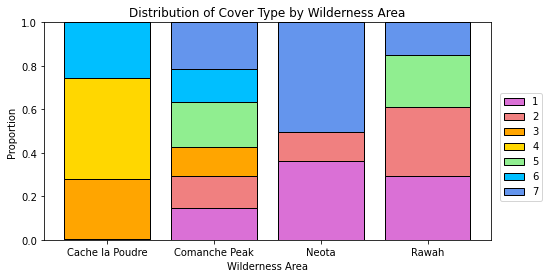

In [8]:
ct_by_wa_props = ct_by_wa/ np.sum(ct_by_wa, axis = 0)
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize=[8,4])

for index in range(len(ct_by_wa_props)):
    prop_row = ct_by_wa_props.iloc[index].to_numpy()
    bottom_row = bb.iloc[index].to_numpy()
    
    plt.bar(ct_by_wa_props.columns, prop_row, bottom = bottom_row, edgecolor = 'black', color = palette[index], label = ct_by_wa_props.index[index])
    
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1.01,0.7))
plt.show()

## Part 3: Distribution of Cover Type by Soil Type

In this section, we will create a dataframe to look at the distribution of regions for each cover type for each soil type. Then, we will visualize the dataframe through a stacked bar chart.

In [9]:
ct_by_st = pd.crosstab(fc['Cover_Type'],fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


We will now create a stacked bar chart from the information in the above dataframe.

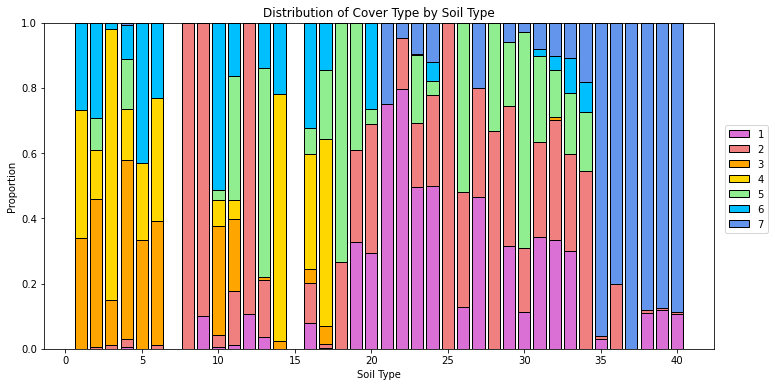

In [10]:
ct_by_st_props = ct_by_st/ np.sum(ct_by_st, axis = 0)
bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize=[12,6])

for index in range(len(ct_by_st_props)):
    prop_row = ct_by_st_props.iloc[index].to_numpy()
    bottom_row = bb.iloc[index].to_numpy()
    
    plt.bar(ct_by_st_props.columns, prop_row, bottom = bottom_row, edgecolor = 'black', color = palette[index], label = ct_by_st_props.index[index])
    
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1.01,0.7))
plt.show()

## Part 4: Distribution of Elevation by Cover Type

In this section, we will calculate the average elevation for each of the seven cover types. Then we will create histograms to show the distributions of elevations for each cover type.

In [11]:
fc[['Elevation','Cover_Type']].groupby('Cover_Type').mean()

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


We will create a histogram to show the distribution of elevations for each of the cover types.

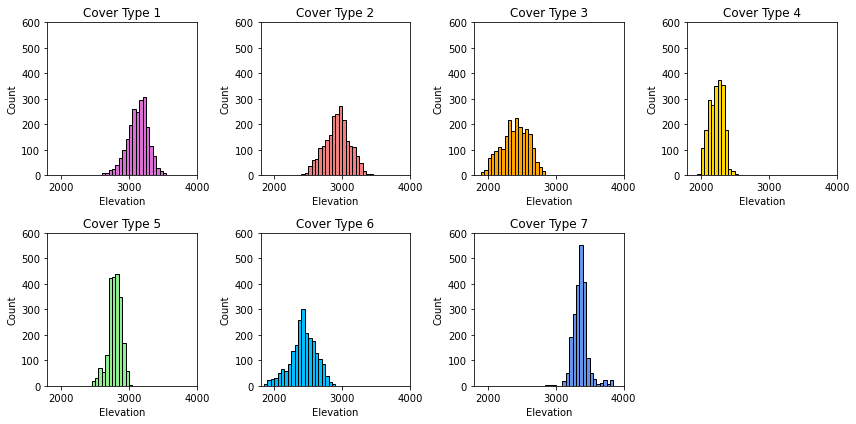

In [12]:
cover_types = sorted(fc['Cover_Type'].unique())
plt.figure(figsize = [12,6])
for index in range(len(cover_types)):
    plt.subplot(2,4,index+1)          
    bins = np.arange(1800, 4050, 50)
    x = fc[['Elevation','Cover_Type']].loc[fc['Cover_Type'] == index + 1]['Elevation']
    plt.hist(x, bins = bins, edgecolor='black', color= palette[index])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    plt.xlim([1800, 4000])
    plt.ylim([0, 600])
    plt.title(f'Cover Type {index + 1}')
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets

In this section, we will create training, validation, and test sets, and in order to do that, we need to separate the data by categorical features, numerical features, and labels.

In [13]:
X_num = fc.iloc[:,0:10].values
X_cat = fc.iloc[:,10:12].values
y = fc.iloc[:,-1].values

print(f'''
Numerical Feature Array Shape:   {X_num.shape}
Categorical Feature Array Shape: {X_cat.shape}
Label Array Shape:               {y.shape}''')


Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


We will now encode the categorical variables using one-hot encoding.

In [14]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print('Encoded Feature Array Shape:', X_enc.shape)

Encoded Feature Array Shape: (15120, 42)


We will now combine the numerical features with the encoded features.

In [15]:
X = np.hstack((X_num,X_enc))
print('Feature Array Shape: ', X.shape)

Feature Array Shape:  (15120, 52)


We will now split the data into training, calidation, and test sets, using a 70/15/15 split.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

print(f'''
Training Features Shape:  {y_train.shape}
Validation eatures Shape: {y_valid.shape} 
Test Features Shape:      {y_test.shape}
''')



Training Features Shape:  (10584,)
Validation eatures Shape: (2268,) 
Test Features Shape:      (2268,)



## Part 6: Logistic Regression Model

In this section, we will create and evaluate a logistic regression model.

In [17]:
lr_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, multi_class = 'multinomial')
lr_mod.fit(X_train, y_train)

print(f'''
Training Accuracy:   {round(lr_mod.score(X_train, y_train),4)}
Validation Accuracy: {round(lr_mod.score(X_test, y_test),4)}''')


Training Accuracy:   0.6144
Validation Accuracy: 0.6146


/Users/symphonyhopkins/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models

In this section, we will create and evaluate decision tree models.

In [18]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2,30)

for d in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
    


dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

print(f'''
Optimal Value of max_depth:            {dt_opt_depth}
Training Accuracy for Optimal Model:   {round(temp_tree.score(X_train, y_train),4)}
Validation Accuracy for Optimal Model: {round(temp_tree.score(X_valid, y_valid),4)}
''')


Optimal Value of max_depth:            18
Training Accuracy for Optimal Model:   0.9988
Validation Accuracy for Optimal Model: 0.7646



We will now create a plot to display the training and validation curves as a function of max_depth.

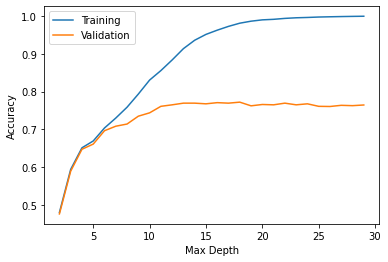

In [19]:
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 8: Random Forest Models

We will now create and evaulate a random forest tree model.

In [20]:
rf_train_acc = []
rf_valid_acc = []

depth_range = range(2,30)

for d in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=d, random_state=1, n_estimators = 100)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
    


rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

print(f'''
Optimal Value of max_depth:            {rf_opt_depth}
Training Accuracy for Optimal Model:   {round(temp_forest.score(X_train, y_train),4)}
Validation Accuracy for Optimal Model: {round(temp_forest.score(X_valid, y_valid),4)}
''')


Optimal Value of max_depth:            28
Training Accuracy for Optimal Model:   1.0
Validation Accuracy for Optimal Model: 0.8651



We will now create a plot to display the training and validation curves as a function of max_depth.

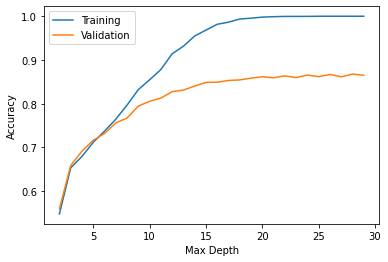

In [21]:
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model

Because the Random Forest Models gave us the best performance on the validation set, we will use it as our final model with the following parameter values: max_depth = 28, random_state=1, n_estimators = 100.

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(max_depth=28, random_state=1, n_estimators = 100)
final_model.fit(X_train, y_train)


print(f'''
Training Accuracy for Final Model::    {round(final_model.score(X_train, y_train),4)}
Validation Accuracy for Final Model:   {round(final_model.score(X_valid, y_valid),4)}
Testing Accuracy for Final Model:      {round(final_model.score(X_test, y_test),4)}
''')


Training Accuracy for Final Model::    1.0
Validation Accuracy for Final Model:   0.8677
Testing Accuracy for Final Model:      0.8593



We will now create and display a confusion matrix detailing the model's performance on the test set.

In [23]:
test_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, test_pred)
pd.DataFrame(cm, index = cover_types, columns = cover_types)

,1,2,3,4,5,6,7
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


Now, we will generate a classification report to provide further insight into the model's performance on the test set.

In [24]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

